In [ ]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import random
from sklearn.metrics import roc_curve



In [ ]:
#Using different colors for ploting graphs
color_array = ['#0592D0','#Cd7f32', '#E97451', '#Bdb76b', '#954535', '#C2b280', '#808000','#C2b280', '#E4d008', '#9acd32', '#Eedc82', '#E4d96f',
           '#32cd32','#39ff14','#00ff7f', '#008080', '#36454f', '#F88379', '#Ff4500', '#Ffb347', '#A94064', '#E75480', '#Ffb6c1', '#E5e4e2',
           '#Faf0e6', '#8c92ac', '#Dbd7d2','#A7a6ba', '#B38b6d']

#Data exploration and preprocessing

In [ ]:
#Loading Data
df = pd.read_csv('/Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
#Displaying the dataset
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
#Data types of all attributes
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [ ]:
#Checking if there are any Null values
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [ ]:
#Size of the data set
df.size

17600

In [ ]:
df.shape

(2200, 8)

In [ ]:
#Minimum value of each attribute
df.min()

N                      0
P                      5
K                      5
temperature     8.825675
humidity        14.25804
ph              3.504752
rainfall       20.211267
label              apple
dtype: object

In [ ]:
#Maximum value of each attribute
df.max()

N                     140
P                     145
K                     205
temperature     43.675493
humidity        99.981876
ph               9.935091
rainfall       298.560117
label          watermelon
dtype: object

In [ ]:
#Calculating coorelation between columns
correlation= df.corr()

In [ ]:
print(correlation)

                    N         P         K  temperature  humidity        ph  \
N            1.000000 -0.231460 -0.140512     0.026504  0.190688  0.096683   
P           -0.231460  1.000000  0.736232    -0.127541 -0.118734 -0.138019   
K           -0.140512  0.736232  1.000000    -0.160387  0.190859 -0.169503   
temperature  0.026504 -0.127541 -0.160387     1.000000  0.205320 -0.017795   
humidity     0.190688 -0.118734  0.190859     0.205320  1.000000 -0.008483   
ph           0.096683 -0.138019 -0.169503    -0.017795 -0.008483  1.000000   
rainfall     0.059020 -0.063839 -0.053461    -0.030084  0.094423 -0.109069   

             rainfall  
N            0.059020  
P           -0.063839  
K           -0.053461  
temperature -0.030084  
humidity     0.094423  
ph          -0.109069  
rainfall     1.000000  


<Axes: >

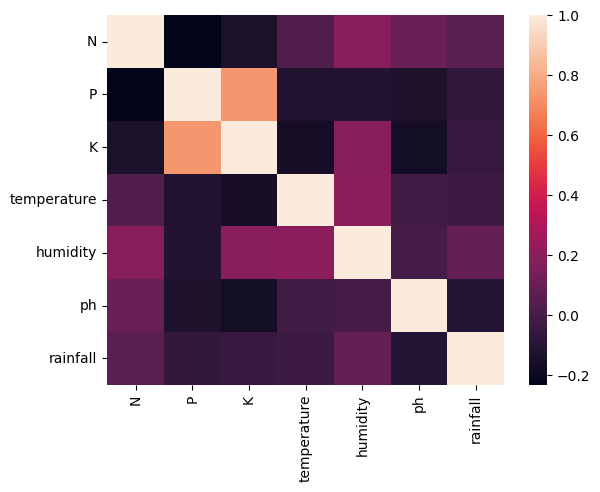

In [ ]:
#Displaying Coorelation matrix
sns.heatmap(correlation)

In [ ]:
df.isnull().any()

N              False
P              False
K              False
temperature    False
humidity       False
ph             False
rainfall       False
label          False
dtype: bool

In [ ]:
#Crops available
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

<Figure size 1190x560 with 0 Axes>

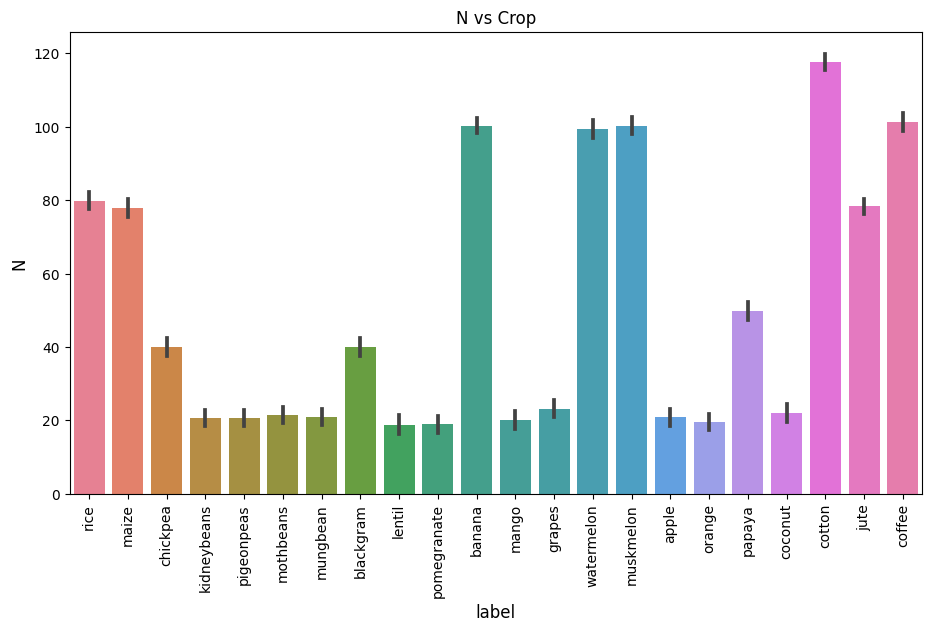

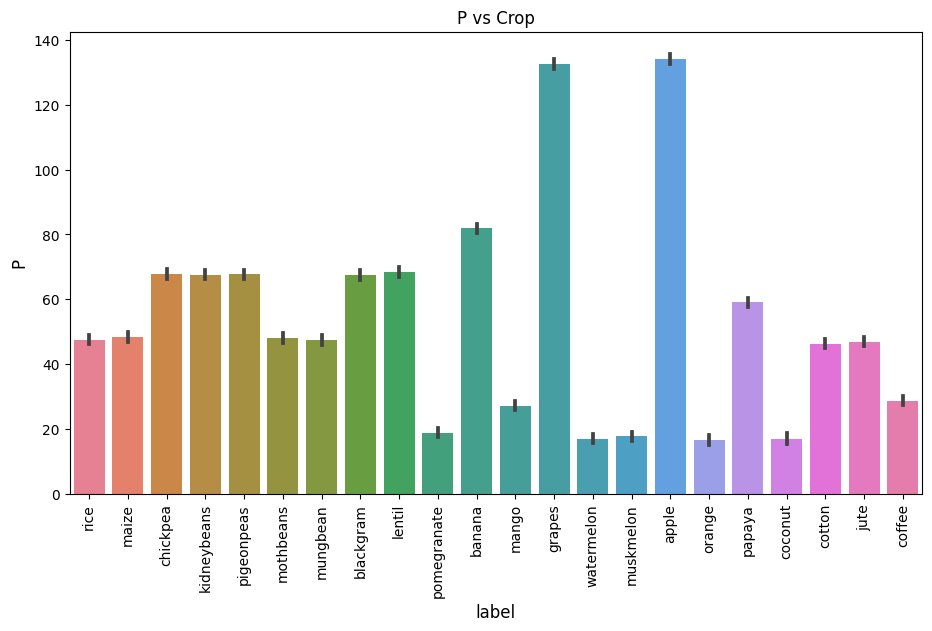

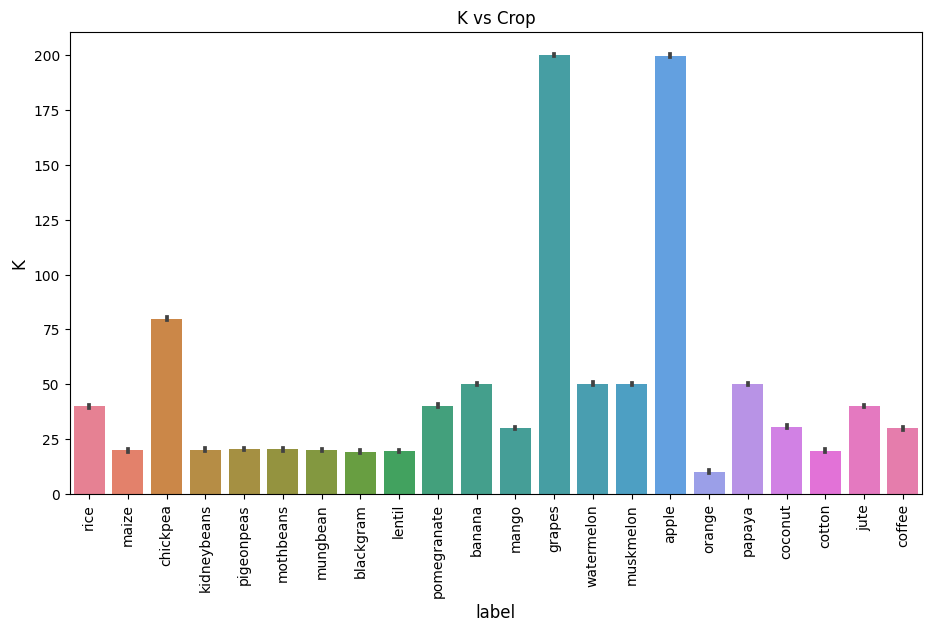

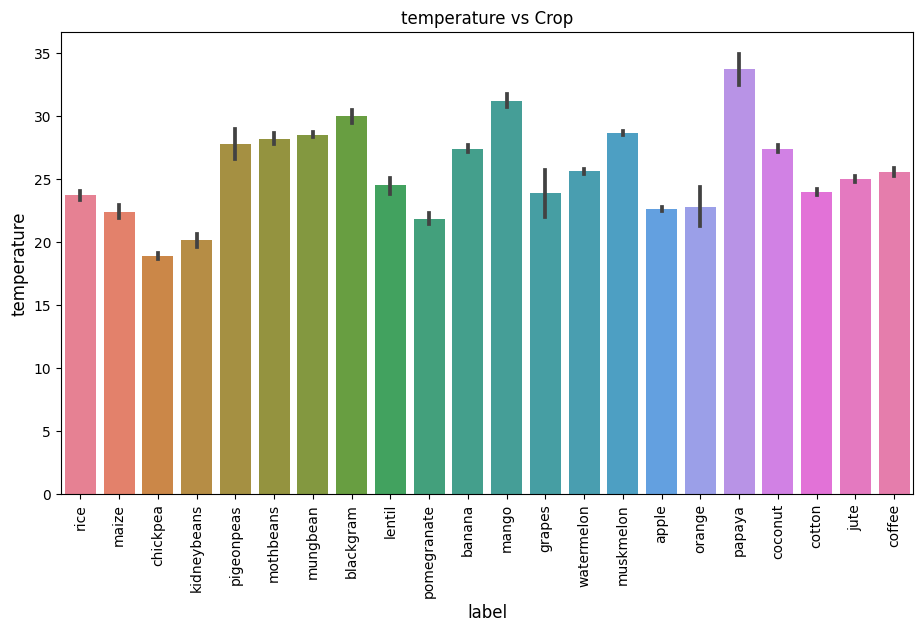

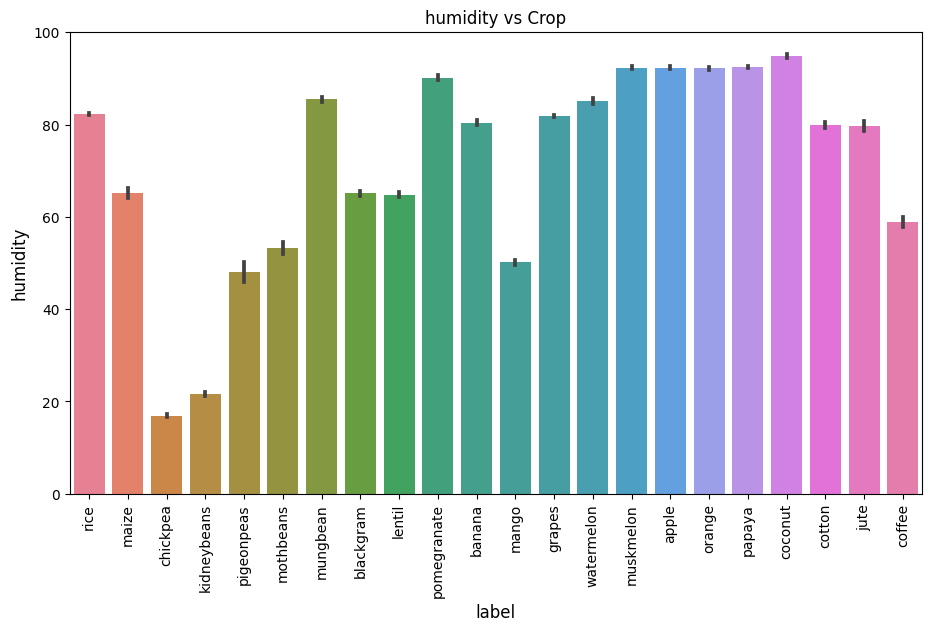

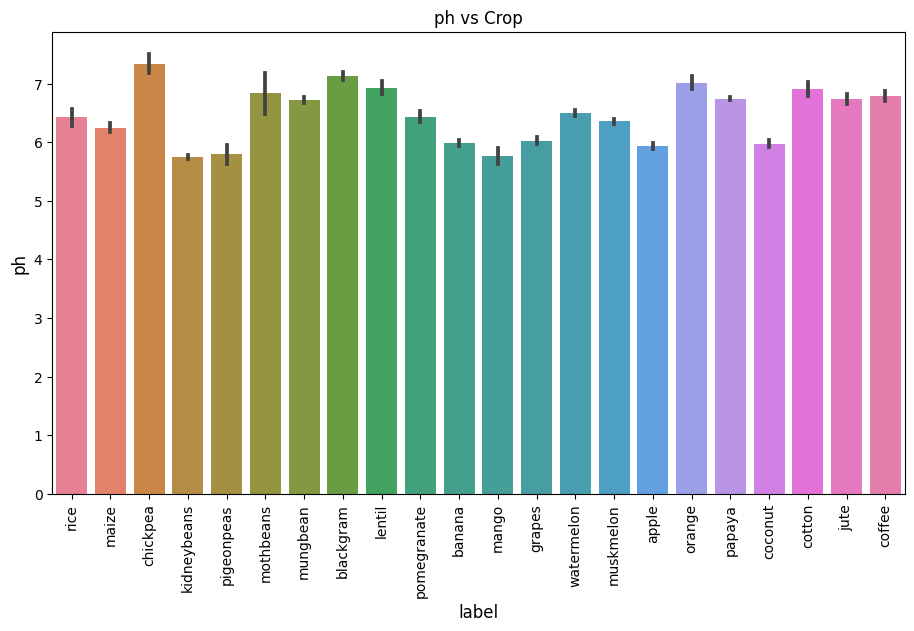

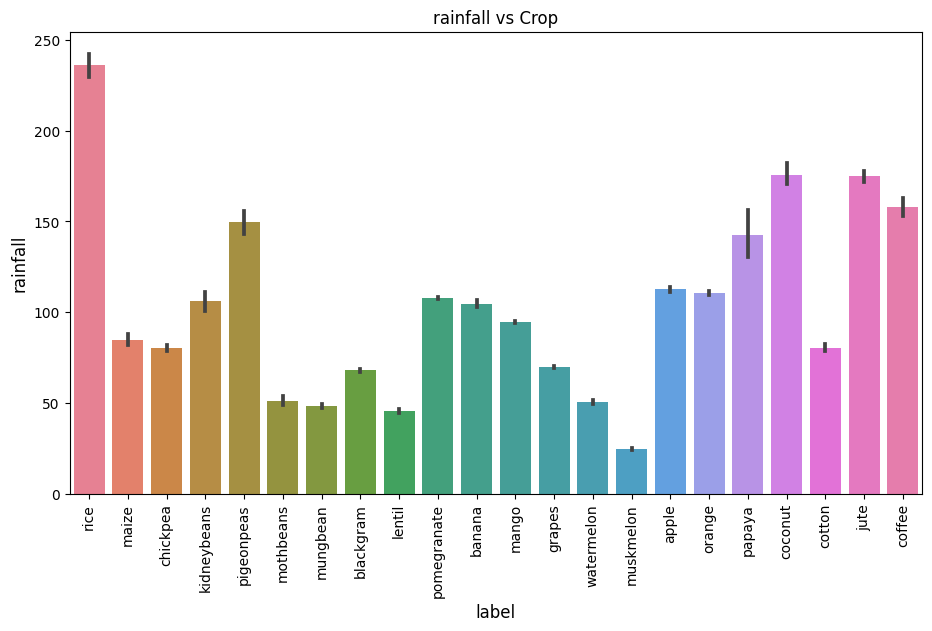

In [ ]:
#Plot for how different attributes affect the crop growth
plt.figure(figsize=(17,8),dpi=70)
for column in df.columns[:-1]:
    plt.figure(figsize = (11, 6))
    sns.barplot(x = 'label', y = column, data = df, palette = 'husl')
    plt.xlabel('label', fontsize = 12)
    plt.ylabel(column, fontsize = 12)
    plt.xticks(rotation=90)
    plt.title(f'{column} vs Crop')
    plt.show()

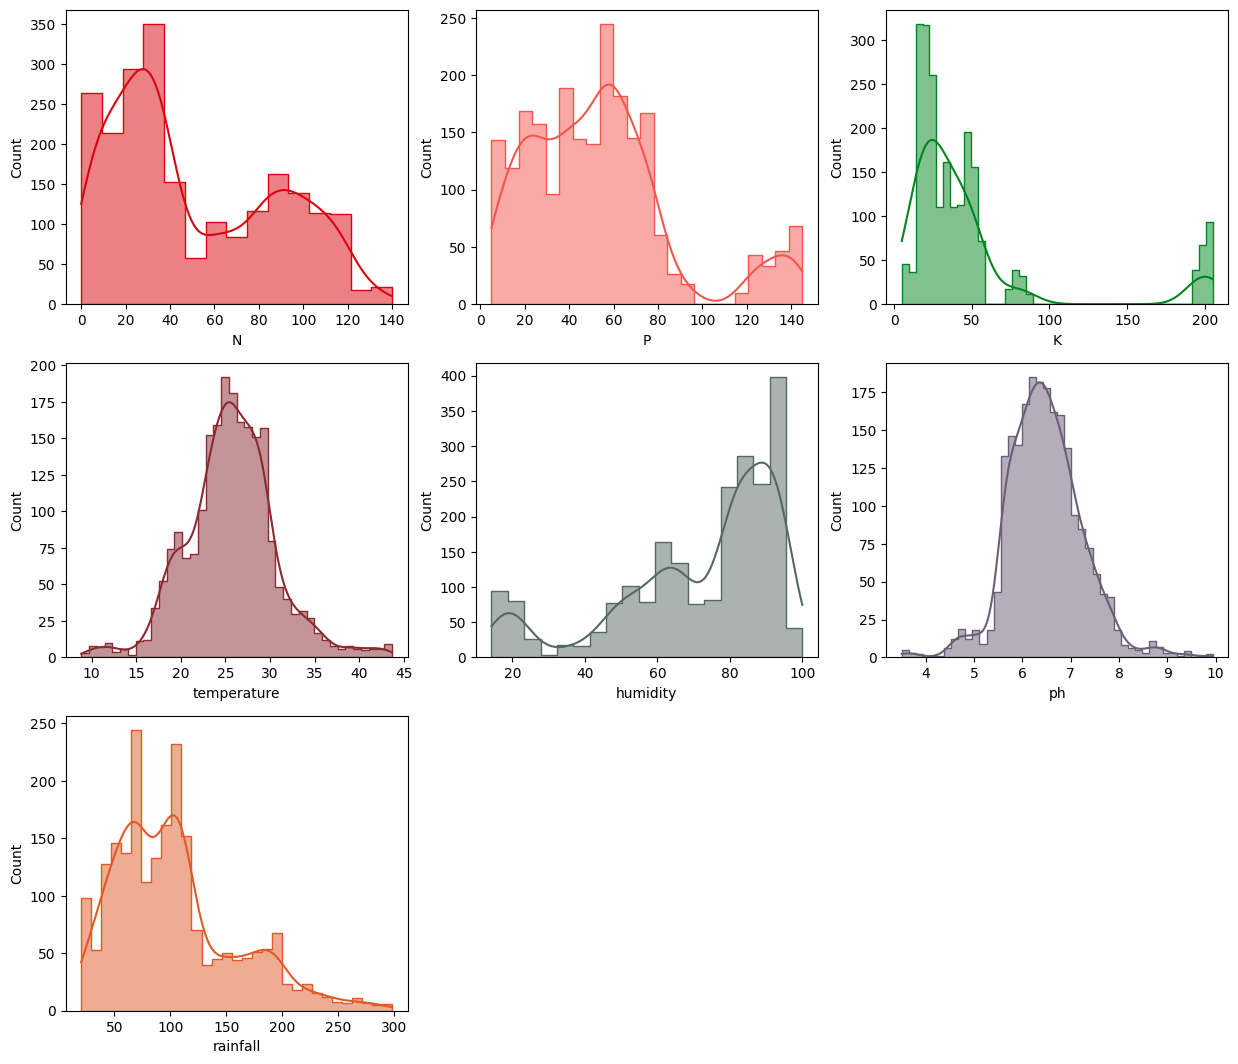

In [ ]:
#Distribution of attributes
plt.figure(figsize=(15,13))
i = 1
for column in df.columns[:-1]:
    plt.subplot(3,3,i)
    rgb = np.random.rand(3,)
    sns.histplot(df[column], kde = True, color = rgb, element = 'step')
    i+=1
plt.show()

In [ ]:
#Summery of different crops with respect to the attributes
crop_summary = pd.pivot_table(df,index=['label'],aggfunc='mean')
crop_summary.head()

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892


In [ ]:
#Calculating the amount of nitrogen required by different plants
crop_summary_N = crop_summary.sort_values(by='N', ascending=False)

fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_N['N'][0:10].sort_values().index,
    'x' : crop_summary_N['N'][0:10].sort_values()
}

last = {
    'y' : crop_summary_N['N'][-10:].index,
    'x' : crop_summary_N['N'][-10:]
}

fig.add_trace(
    go.Bar(top,
           name="Most nitrogen required",
           marker_color=random.choice(color_array),
           orientation='h',
          text=top['x']),

    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least nitrogen required",
           marker_color=random.choice(color_array),
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Nitrogen (N)",
                  plot_bgcolor='white',
                  font_size=12,
                  font_color='black',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
#Calculating the amount of phosphorous required by different plants
crop_summary_P = crop_summary.sort_values(by='P', ascending=False)

fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_P['P'][0:10].sort_values().index,
    'x' : crop_summary_P['P'][0:10].sort_values()
}

last = {
    'y' : crop_summary_P['P'][-10:].index,
    'x' : crop_summary_P['P'][-10:]
}

fig.add_trace(
    go.Bar(top,
           name="Most phosphorus required",
           marker_color=random.choice(color_array),
           orientation='h',
          text=top['x']),

    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least phosphorus required",
           marker_color=random.choice(color_array),
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Phosphorus (P)",
                  plot_bgcolor='white',
                  font_size=12,
                  font_color='black',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
#Calculating the amount of potassium required by different plants
crop_summary_K = crop_summary.sort_values(by='K', ascending=False)

fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_K['K'][0:10].sort_values().index,
    'x' : crop_summary_K['K'][0:10].sort_values()
}

last = {
    'y' : crop_summary_K['K'][-10:].index,
    'x' : crop_summary_K['K'][-10:]
}

fig.add_trace(
    go.Bar(top,
           name="Most potassium required",
           marker_color=random.choice(color_array),
           orientation='h',
          text=top['x']),

    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least potassium required",
           marker_color=random.choice(color_array),
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Potassium (K)",
                  plot_bgcolor='white',
                  font_size=12,
                  font_color='black',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
#N, P, K values comparision between crops
fig = go.Figure()
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['N'],
    name='Nitrogen',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['P'],
    name='Phosphorous',
    marker_color='lightsalmon'
))
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['K'],
    name='Potash',
    marker_color='crimson'
))

fig.update_layout(title="N, P, K values comparision between crops",
                  plot_bgcolor='white',
                  barmode='group',
                  xaxis_tickangle=-45)

fig.show()

In [ ]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']

<Axes: >

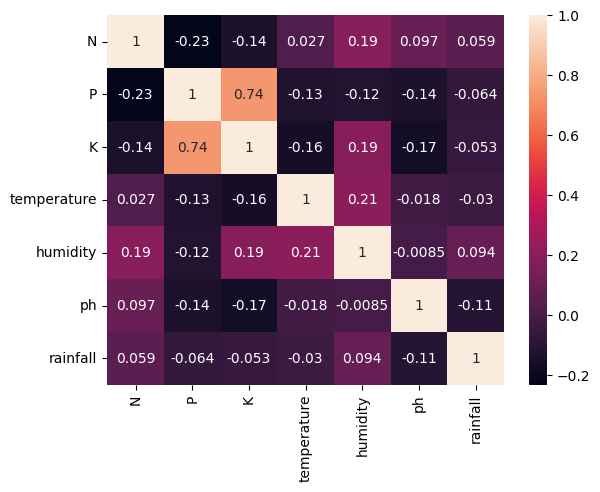

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
df1 = df.copy()
df1.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
#Temperature encoding
df1['temp'] = pd.cut(x=df1['temperature'], bins=[0,32,39,50],
                     labels=['low','moderate','high'])

In [ ]:
#Humidity Encoding
df1['humidity_level'] = pd.cut(x=df1['humidity'], bins=[0,30,60,100],
                     labels=['low','moderate','high'])

In [ ]:
#pH encoding
df1['ph_level'] = pd.cut(x=df1['ph'], bins=[0,7.0,7.9,10],
                     labels=['acidic','neutral','base'])

In [ ]:
#Rainfall encoding
df1['rainfall_level'] = pd.cut(x=df1['rainfall'], bins=[0 , 30 ,90,160,300],
                     labels=['low','moderate','high','heavy'])

In [ ]:
#Encoded dataframe
df1

,N,P,K,temperature,humidity,ph,rainfall,label,temp,humidity_level,ph_level,rainfall_level
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,low,high,acidic,heavy
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,low,high,neutral,heavy
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,low,high,neutral,heavy
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,low,high,acidic,heavy
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,low,high,neutral,heavy
...,...,...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,low,high,acidic,heavy
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,low,moderate,acidic,high
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,low,high,acidic,heavy
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,low,moderate,acidic,high


In [ ]:
df1 = df1.drop(['temperature','humidity','ph','rainfall'], axis=1)
df1.head()

,N,P,K,label,temp,humidity_level,ph_level,rainfall_level
0,90,42,43,rice,low,high,acidic,heavy
1,85,58,41,rice,low,high,neutral,heavy
2,60,55,44,rice,low,high,neutral,heavy
3,74,35,40,rice,low,high,acidic,heavy
4,78,42,42,rice,low,high,neutral,heavy


[Text(0.5, 1.0, 'Temperature Feature Distribution after grouping')]

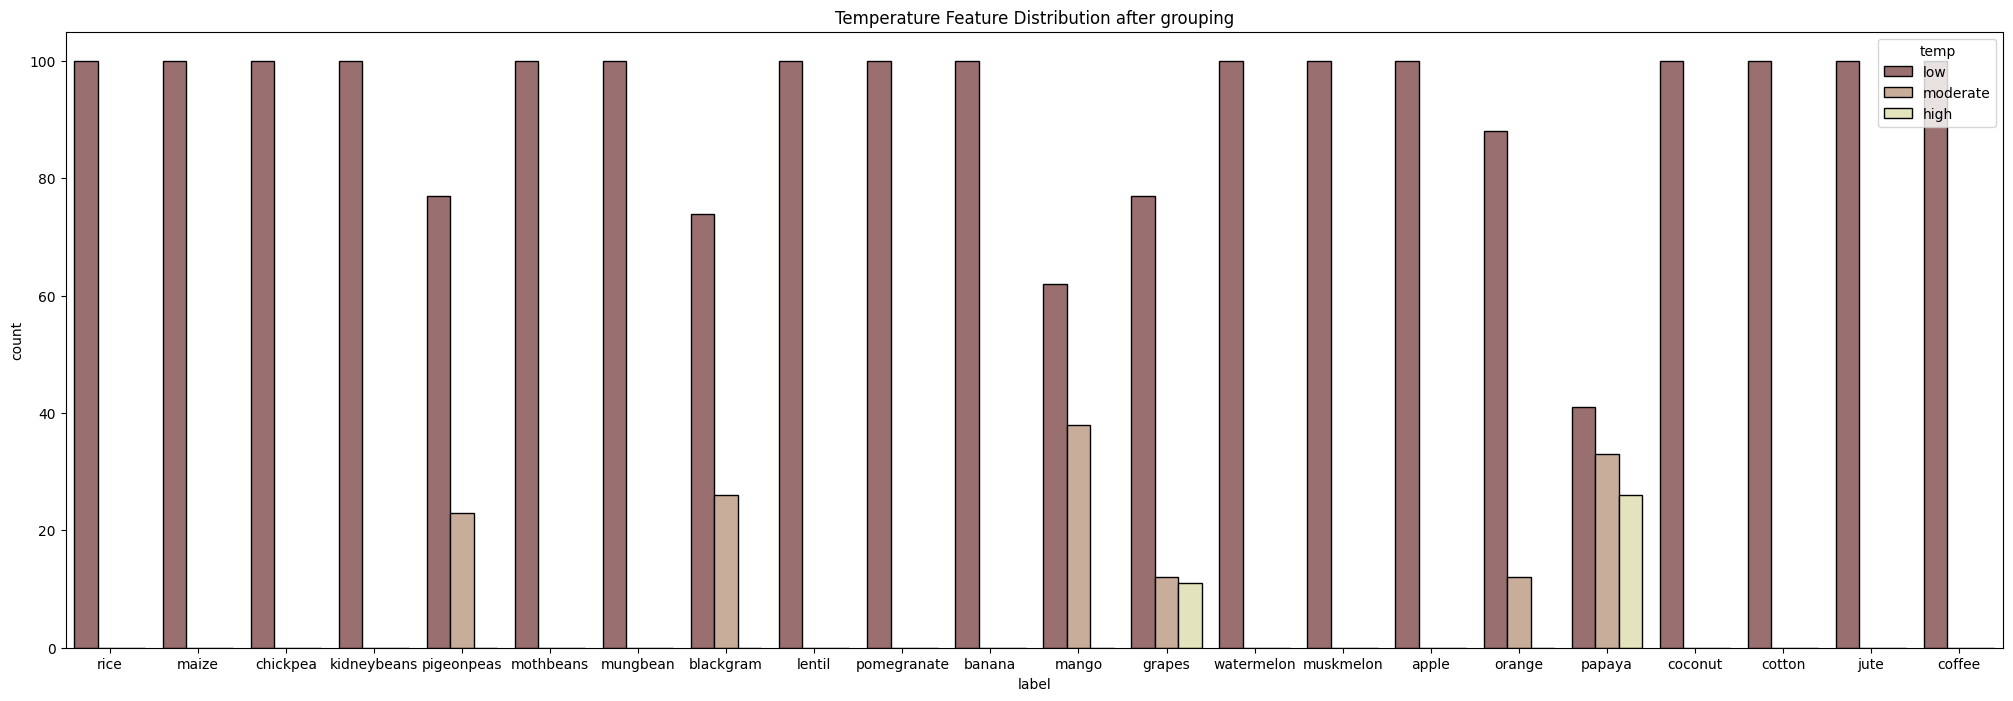

In [ ]:
#Temperature Feature Distribution after grouping
import seaborn as sns
plt.figure(figsize=(25,8))
sns.countplot(data=df1, x='label',palette = 'pink', hue='temp',edgecolor='black').set(title='Temperature Feature Distribution after grouping')


[Text(0.5, 1.0, 'Humidity level Feature Distribution after grouping')]

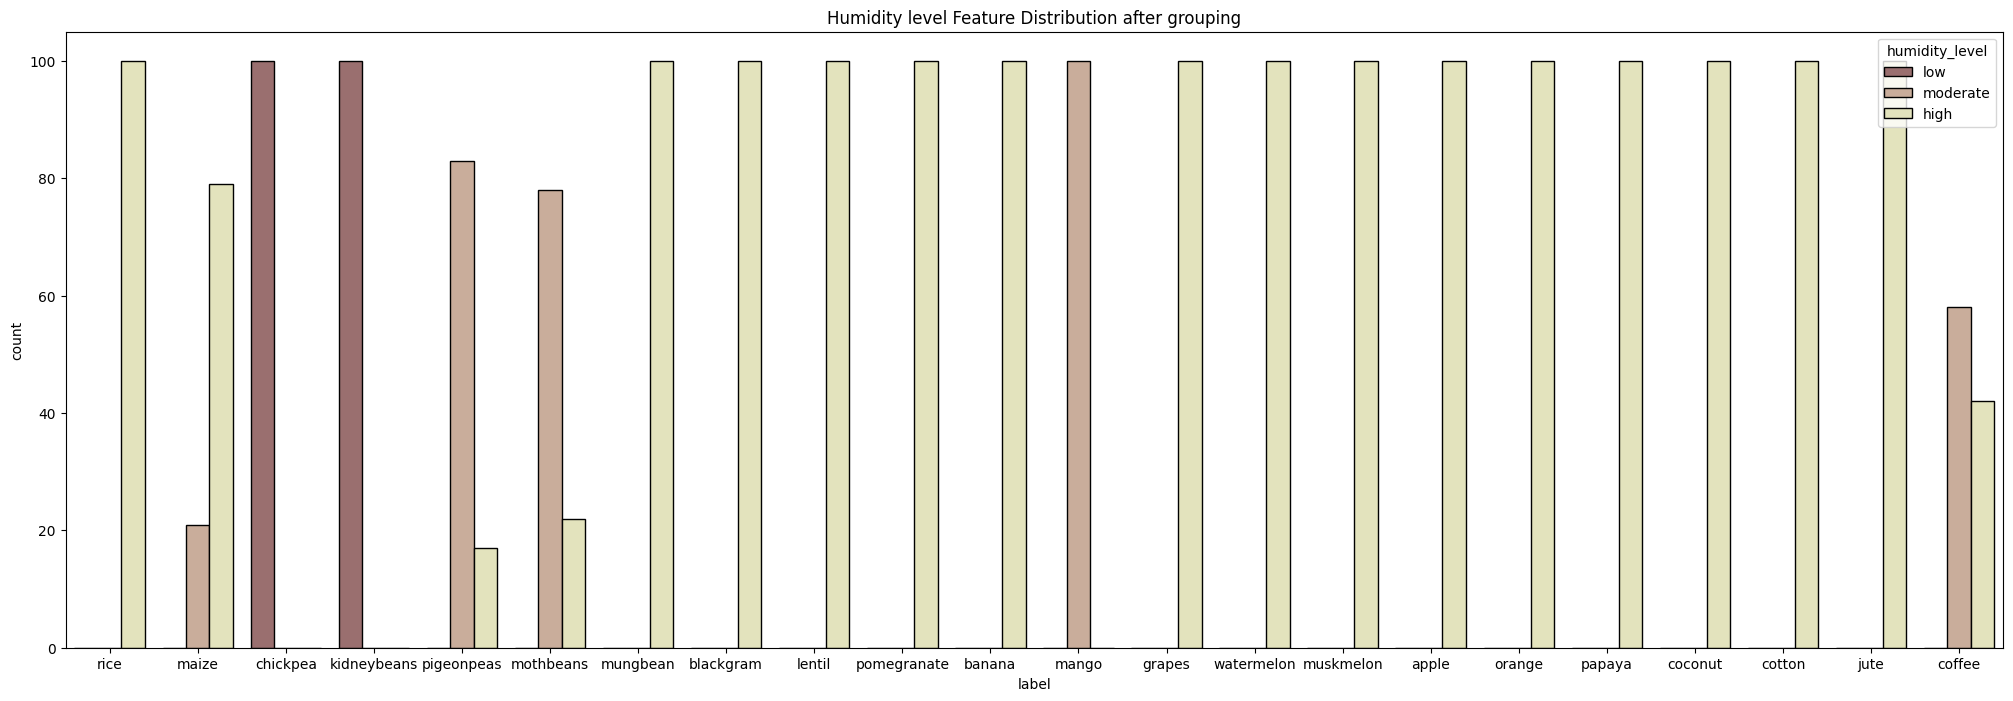

In [ ]:
#Humidity level Feature Distribution after grouping
plt.figure(figsize=(25,8))
sns.countplot(data=df1, x='label',palette = 'pink', hue='humidity_level',edgecolor='black').set(title='Humidity level Feature Distribution after grouping')


[Text(0.5, 1.0, 'ph level Feature Distribution after grouping')]

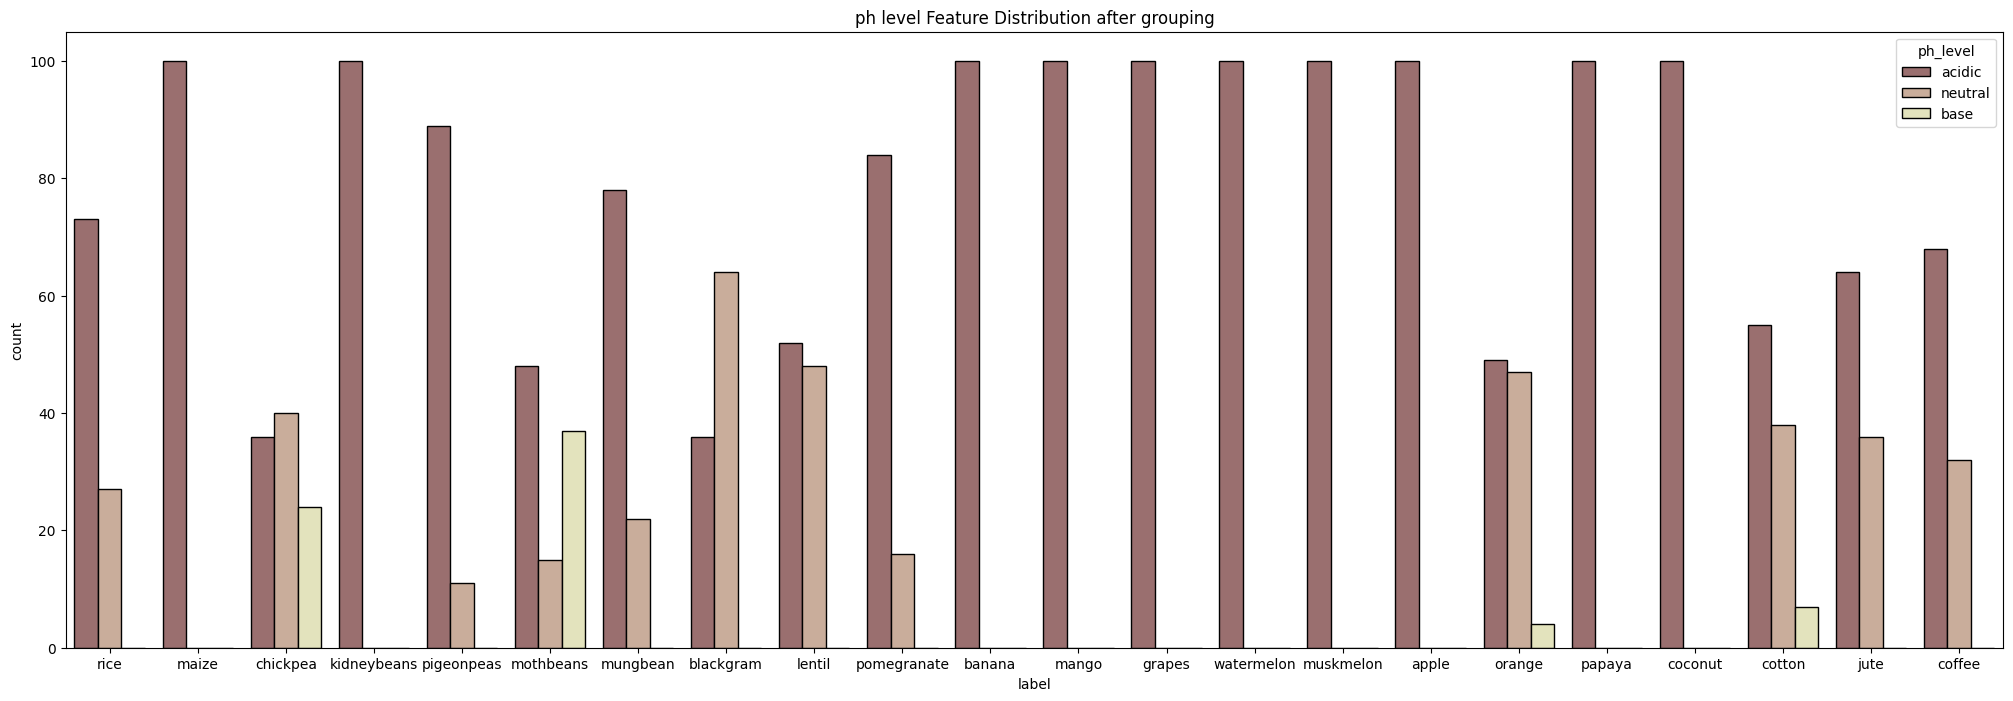

In [ ]:
#ph level Feature Distribution after grouping
plt.figure(figsize=(25,8))
sns.countplot(data=df1, x='label',palette = 'pink', hue='ph_level',edgecolor='black').set(title='ph level Feature Distribution after grouping')


[Text(0.5, 1.0, 'Rainfall Feature Distribution after grouping')]

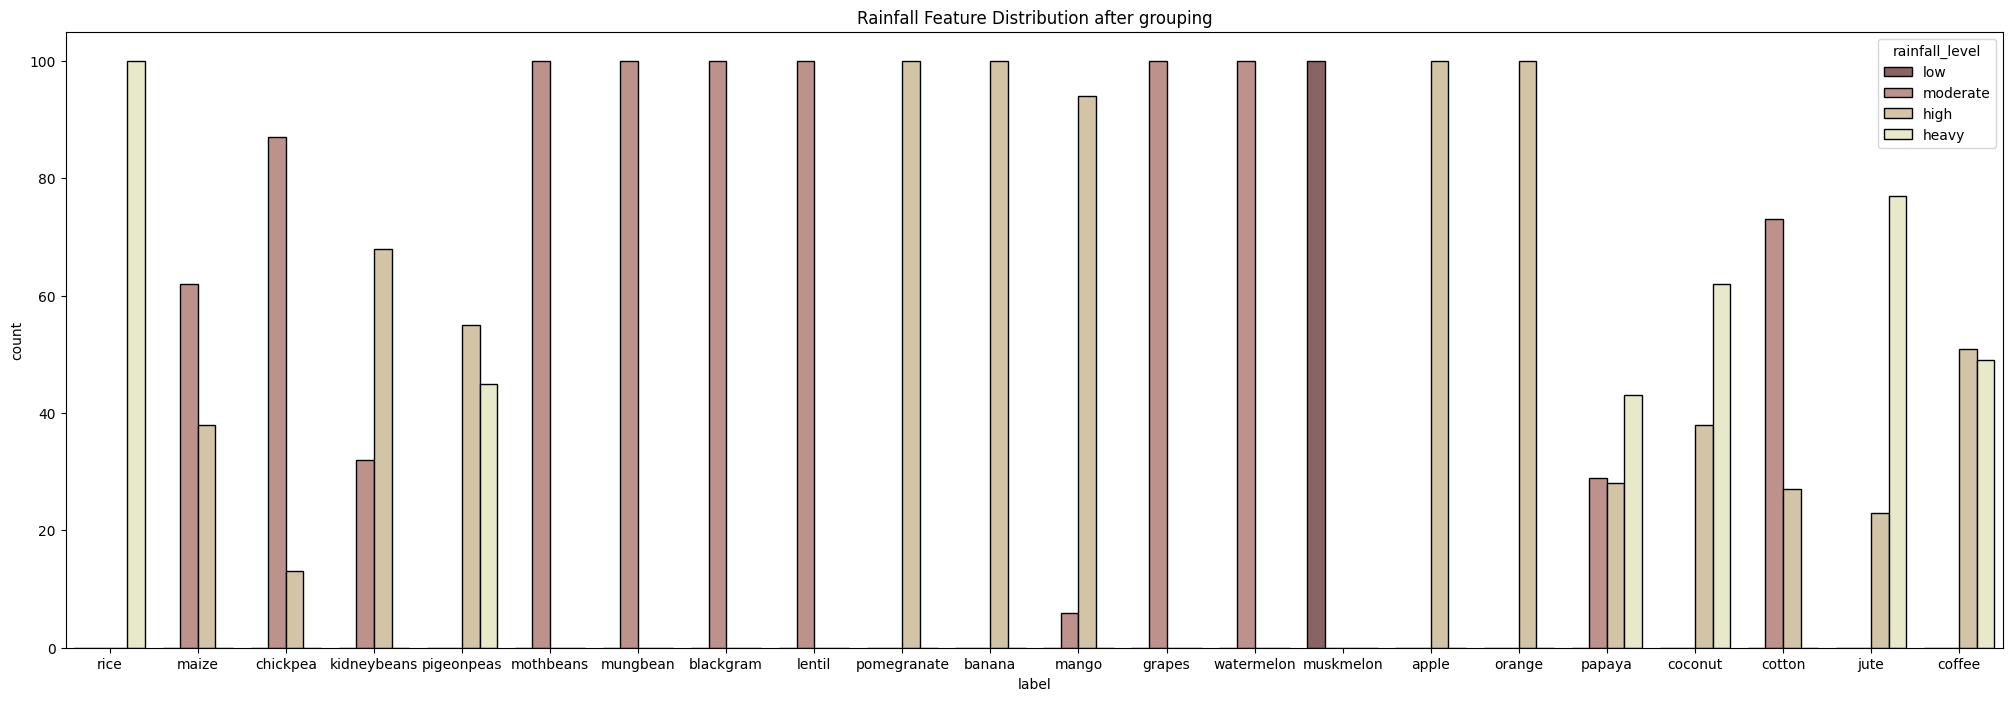

In [ ]:
#Rainfall Feature Distribution after grouping
plt.figure(figsize=(25,8))
sns.countplot(data=df1, x='label',palette = 'pink', hue='rainfall_level',edgecolor='black').set(title='Rainfall Feature Distribution after grouping')


In [ ]:
#Train test data split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,target,test_size = 0.2,random_state =2)

In [ ]:
from sklearn.linear_model import LogisticRegression

LogisticRegressionModel = LogisticRegression(random_state=2)

LogisticRegressionModel.fit(X_train,y_train)

y_pred = LogisticRegressionModel.predict(X_test)

x = metrics.accuracy_score(y_test, y_pred)

y = metrics.precision_score(y_test,y_pred,average='macro')

z = metrics.recall_score(y_test,y_pred,average='macro')

print("Logistic Regression's Accuracy is: ", x)

print("Logistic Regression's Precision is: ", y)

print("Logistic Regression's Recall is: ", z)


Logistic Regression's Accuracy is:  0.9522727272727273
Logistic Regression's Precision is:  0.9540378567543254
Logistic Regression's Recall is:  0.9486827865117339


In [ ]:
print("Logistic Regression Classification Report for each crop")
print(classification_report(y_test, y_pred))

Logistic Regression Classification Report for each crop
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.86      0.75      0.80        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.86      0.90      0.88        20
      grapes       1.00      1.00      1.00        18
        jute       0.84      0.93      0.88        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.88      1.00      0.94        23
       maize       0.90      0.86      0.88        21
       mango       0.96      1.00      0.98        26
   mothbeans       0.84      0.84      0.84        19
    mungbean       1.00      0.96      0.98        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00  

In [ ]:
from sklearn.svm import SVC

SVM = SVC(gamma = 0.01)

SVM.fit(X_train,y_train)

y_pred = SVM.predict(X_test)

x = metrics.accuracy_score(y_test, y_pred)
y = metrics.precision_score(y_test,y_pred,average='macro')
z = metrics.recall_score(y_test,y_pred,average='macro')
# acc.append(x)
# model.append('SVM')
print("SVM's Accuracy is: ", x)
print("SVM's Precision is: ", y)
print("SVM's Recall is: ", z)


SVM's Accuracy is:  0.9613636363636363
SVM's Precision is:  0.9660156020450139
SVM's Recall is:  0.9628355927698032


In [ ]:
print("SVM Classification Report for each crop")
print(classification_report(y_test, y_pred))

SVM Classification Report for each crop
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      0.81      0.89        21
      coffee       1.00      1.00      1.00        22
      cotton       0.95      1.00      0.98        20
      grapes       1.00      0.94      0.97        18
        jute       0.88      0.82      0.85        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RFModel = RandomForestClassifier(random_state=0)
RFModel.fit(X_train,y_train)

y_pred = RFModel.predict(X_test)

x = metrics.accuracy_score(y_test, y_pred)
y = metrics.precision_score(y_test,y_pred,average='macro')
z = metrics.recall_score(y_test,y_pred,average='macro')
# acc.append(x)
# model.append('RF')
print("RF's Accuracy is: ", x)
print("RF's Precision is: ", y)
print("RF's Recall is: ", z)

RF's Accuracy is:  0.9954545454545455
RF's Precision is:  0.996969696969697
RF's Recall is:  0.9943181818181818


In [ ]:
print("Random Forest Classification Report for each crop")
print(classification_report(y_test, y_pred))

Random Forest Classification Report for each crop
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.93      1.00      0.97        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.

In [ ]:
import xgboost as xgb
XBModel = xgb.XGBClassifier()
XBModel.fit(X_train,y_train)

y_pred = XBModel.predict(X_test)

x = metrics.accuracy_score(y_test, y_pred)
y = metrics.precision_score(y_test,y_pred,average='macro')
z = metrics.recall_score(y_test,y_pred,average='macro')
# acc.append(x)
# model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)
print("XGBoost's Precision is: ", y)
print("XGBoost's Recall is: ", z)

ValueError: ignored

In [ ]:
print("XG Boost Classification Report for each crop")
print(classification_report(y_test, y_pred))

XG Boost Classification Report for each crop
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.93      1.00      0.97        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00   

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, StratifiedKFold, RepeatedStratifiedKFold, learning_curve, train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter distribution using uniform distribution
C = uniform(loc=0, scale=4)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [ ]:
lf = RandomizedSearchCV(LogisticRegressionModel, hyperparameters, random_state=32, n_iter=100, cv=kfold, verbose=0, n_jobs=-1)
search_rf = lf.fit(X_train, y_train)
rf_tuned = search_rf.best_estimator_
y_pred_prob_yes = rf_tuned.predict_proba(X_test)[::,1]
y_pred = rf_tuned.predict(X_test)

In [ ]:
print("LR accuracy score",accuracy_score(y_test, y_pred))
print("LR precision score",precision_score(y_test, y_pred,average='macro'))
print("LR recall score",recall_score(y_test, y_pred,average='macro'))
print("LR f1 score",f1_score(y_test, y_pred,average='macro'))

LR accuracy score 0.9522727272727273
LR precision score 0.9555456082620769
LR recall score 0.9486827865117339
LR f1 score 0.9508451866176638


In [ ]:
from scipy import stats
rand_list = {"C": stats.uniform(2, 10),
             "gamma": stats.uniform(0.1, 1)}

In [ ]:
#Encoding the label column
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
new_df = df.copy()

new_df['label'] = label_encoder.fit_transform(new_df['label'])

new_df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20


<Axes: >

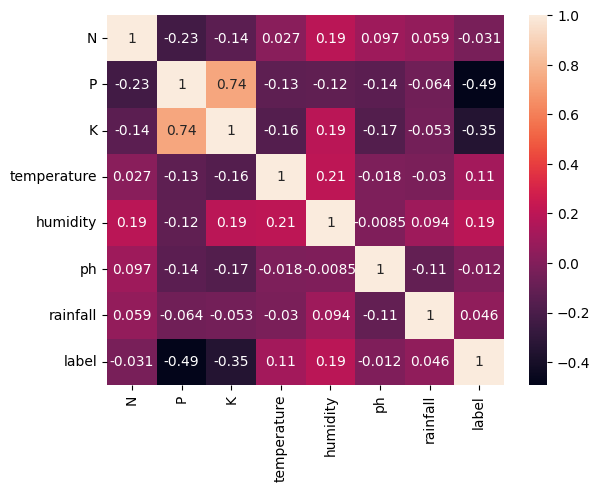

In [ ]:
sns.heatmap(new_df.corr(),annot=True)

In [ ]:
def load_data(data_dir):
    data   = data_dir.iloc[:,:-1]
    labels = data_dir.iloc[:,-1]
    return data, labels

In [ ]:
data, labels = load_data(new_df)

In [ ]:
#pvalue calculation
import statsmodels.api as sm
stat_data = sm.add_constant(data)
#Fitting sm.OLS model
model = sm.OLS(labels,stat_data).fit()
model.pvalues

const          9.913566e-39
N              7.118595e-21
P              6.542538e-54
K              9.374038e-03
temperature    6.940291e-01
humidity       1.439629e-18
ph             1.292782e-04
rainfall       8.878322e-01
dtype: float64

In [ ]:
glm_binom = sm.GLM(labels, stat_data, family=sm.families.Binomial())
res = glm_binom.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  label   No. Observations:                 2200
Model:                            GLM   Df Residuals:                     2192
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                   -inf
Date:                Mon, 28 Aug 2023   Deviance:                   1.6418e+06
Time:                        17:42:15   Pearson chi2:                 1.29e+21
No. Iterations:                     6   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.736e+17   1.61e+07   2.32e+10      

In [ ]:
params = np.exp(res.params)
conf = np.exp(res.conf_int())
conf['OR'] = params
pvalue=round(res.pvalues,3)
conf['pvalue']=pvalue
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
print ((conf))

             CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio  pvalue
const                 inf            inf         inf     0.0
N                     0.0            0.0         0.0     0.0
P                     0.0            0.0         0.0     0.0
K                     0.0            0.0         0.0     0.0
temperature           0.0            0.0         0.0     0.0
humidity              inf            inf         inf     0.0
ph                    0.0            0.0         0.0     0.0
rainfall              0.0            0.0         0.0     0.0


In [ ]:
def categorize(df,crop):
  if(df['label']==crop):
    return 1
  else:
    return 0

In [ ]:
#Calculating the Odd ratio for different
lst = [ 'rice','maize',  'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango',  'watermelon',
        'papaya','coconut', 'cotton', 'jute', 'coffee']

for i in lst:
  df_crop = df.copy()
  df_crop['label']=df_crop.apply(lambda df_crop:categorize(df_crop,i),axis=1)
  data, labels = load_data(df_crop)
  stat_data = sm.add_constant(data)
  glm_binom = sm.GLM(labels, stat_data, family=sm.families.Binomial())
  res = glm_binom.fit()
  params = np.exp(res.params)
  conf = np.exp(res.conf_int())
  conf['OR'] = params
  pvalue=round(res.pvalues,3)
  conf['pvalue']=pvalue
  conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
  print('')
  print('-----------------------------------------------------------------------------------------------------------------')
  print('')
  print("Odd Ratio for",i)
  print ((conf))


-----------------------------------------------------------------------------------------------------------------

Odd Ratio for rice
             CI 95%(2.5%)  CI 95%(97.5%)    Odds Ratio  pvalue
const        5.548389e-13       0.002973  4.061463e-08   0.003
N            1.067832e+00       1.153773  1.109971e+00   0.000
P            9.913816e-01       1.090180  1.039608e+00   0.109
K            8.822334e-01       1.076212  9.744078e-01   0.609
temperature  4.120665e-01       0.692729  5.342758e-01   0.000
humidity     1.069700e+00       1.251527  1.157047e+00   0.000
ph           7.454216e-02       0.498731  1.928120e-01   0.001
rainfall     1.082533e+00       1.150678  1.116086e+00   0.000

-----------------------------------------------------------------------------------------------------------------

Odd Ratio for maize
             CI 95%(2.5%)  CI 95%(97.5%)    Odds Ratio  pvalue
const         3727.312473   2.360800e+06  93805.319912   0.000
N                1.031401   1.047316